In [1]:
!pip install --upgrade nbformat -q
!pip install plotly -q
!pip install pandas -q
!pip install numpy -q
!pip install seaborn -q
!pip install matplotlib -q
!pip install scikit-learn -q
!pip install yellowbrick -q

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import pickle

In [3]:
with open("../../assets/census.pkl", "rb") as file:
    X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(file)

In [4]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [5]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [6]:
neural_network_census = MLPClassifier(verbose=True, max_iter=250, hidden_layer_sizes=(55, 55))
neural_network_census.fit(X_census_train, y_census_train)

Iteration 1, loss = 0.39164916
Iteration 2, loss = 0.32540985
Iteration 3, loss = 0.31396880
Iteration 4, loss = 0.30672469
Iteration 5, loss = 0.30262959
Iteration 6, loss = 0.29864534
Iteration 7, loss = 0.29517227
Iteration 8, loss = 0.29282526
Iteration 9, loss = 0.28950312
Iteration 10, loss = 0.28731639
Iteration 11, loss = 0.28722539
Iteration 12, loss = 0.28359676
Iteration 13, loss = 0.28189969
Iteration 14, loss = 0.27927799
Iteration 15, loss = 0.27786659
Iteration 16, loss = 0.27556487
Iteration 17, loss = 0.27359385
Iteration 18, loss = 0.27191953
Iteration 19, loss = 0.27017640
Iteration 20, loss = 0.26777024
Iteration 21, loss = 0.26596815
Iteration 22, loss = 0.26396066
Iteration 23, loss = 0.26273820
Iteration 24, loss = 0.26090825
Iteration 25, loss = 0.25995238
Iteration 26, loss = 0.25820997
Iteration 27, loss = 0.25673116
Iteration 28, loss = 0.25677016
Iteration 29, loss = 0.25444440
Iteration 30, loss = 0.25224229
Iteration 31, loss = 0.25094923
Iteration 32, los

/home/gabriel/Projects/machine-learning-e-data-science-com-python/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [7]:
predicts = neural_network_census.predict(X_census_test)

In [8]:
predicts

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [9]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
accuracy_score(y_census_test, predicts)

0.8190378710337769

0.8190378710337769

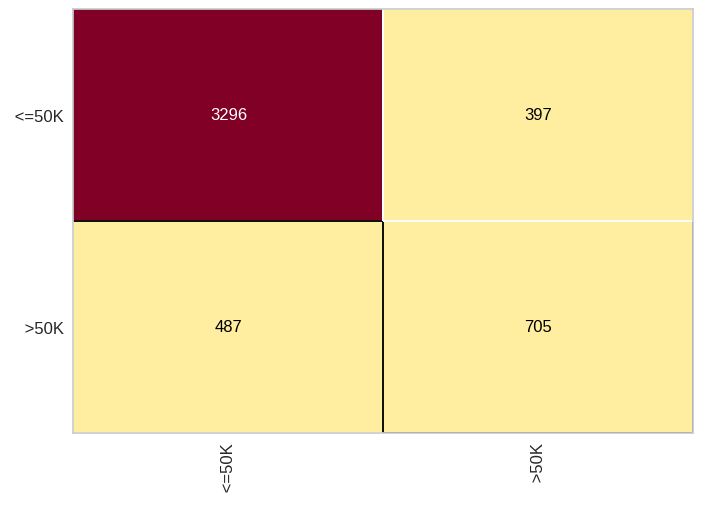

In [12]:
cm = ConfusionMatrix(neural_network_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [13]:
print(classification_report(y_census_test, predicts))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      3693
        >50K       0.64      0.59      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.81      0.82      0.82      4885

